---

## Step 0: Load The Data

In [1]:
import importlib
import traffic_data
import numpy as np
from IPython.display import display, Image, HTML

_ = importlib.reload(traffic_data)

In [2]:
train_file = "data/train.p"
test_file = "data/test.p"

X_train, y_train, X_test, y_test = traffic_data.read(train_file, test_file)


## Step 1: Dataset Summary & Exploration



In [3]:


# Number of training examples
n_train = X_train.shape[0]

# Number of testing examples.
n_test = X_test.shape[0]

# Shape of an traffic sign image?
image_shape = X_train.shape[1:]

# Unique classes/labels there are in the dataset.
n_classes = np.unique(np.append(y_train, y_test)).size

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


In [4]:
import csv

signames = [None] * n_classes
signames_path = "data/signames.csv"
with open(signames_path) as signame_file:
    reader = csv.DictReader(signame_file)
    for row in reader:
        signames[int(row["ClassId"])] = row["SignName"]

#### Training and testing dataset description

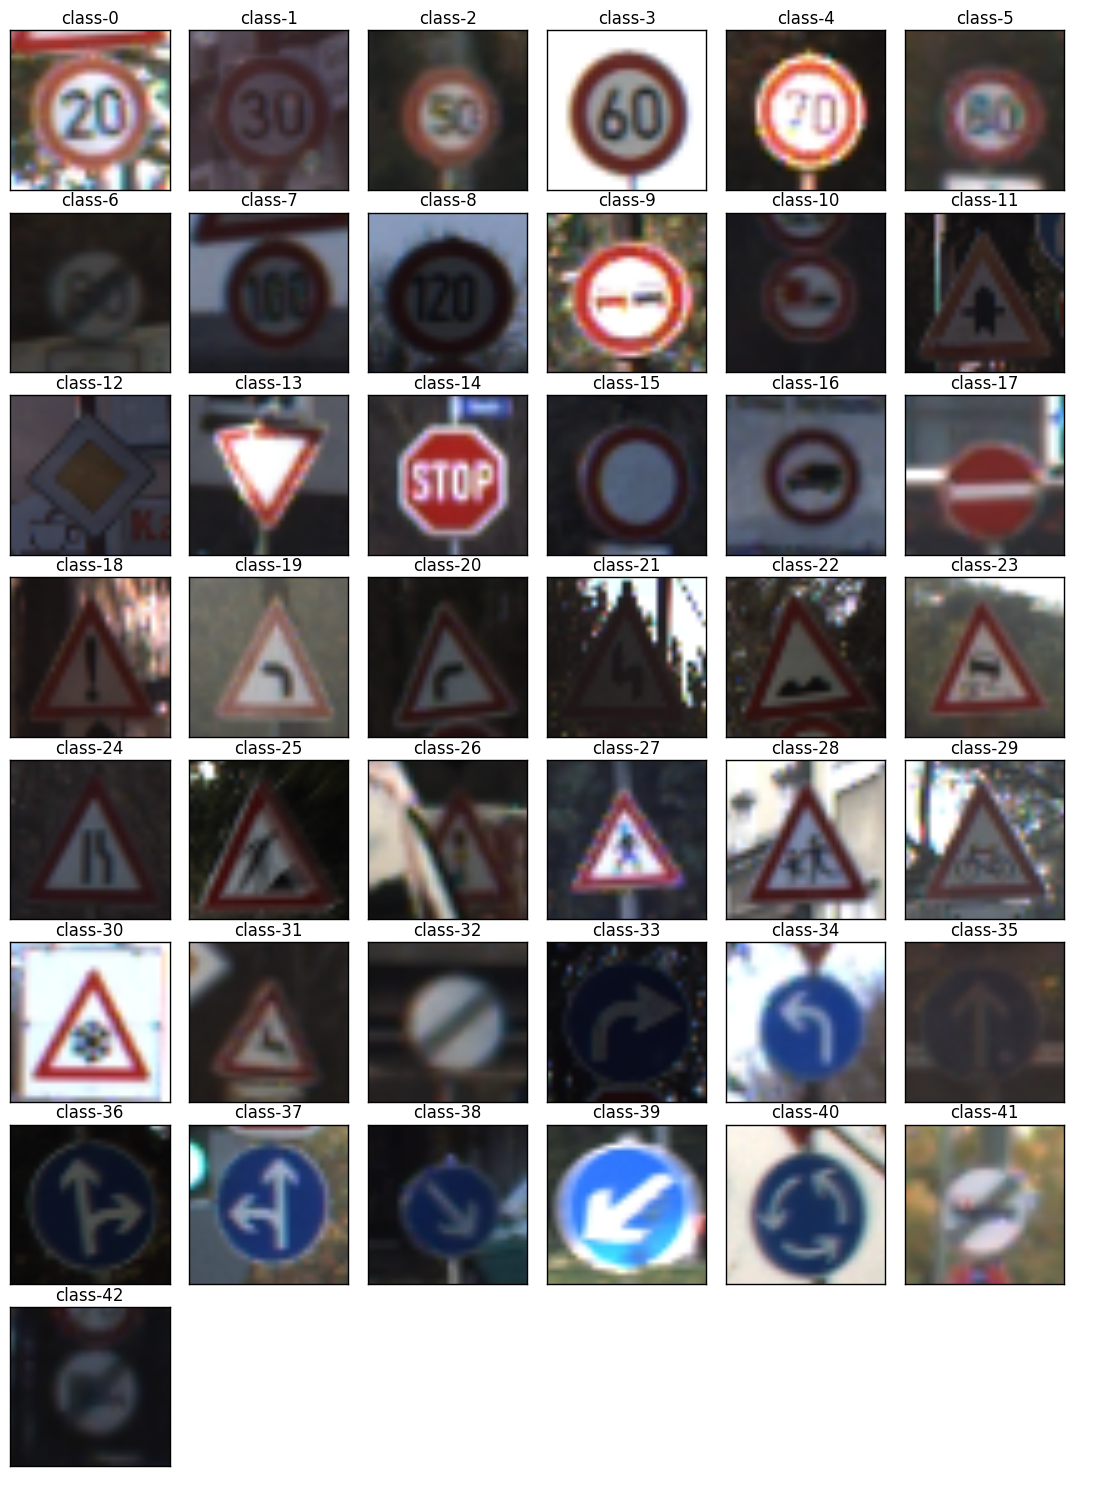

In [5]:
import matplotlib.pyplot as plt
import textwrap
import cv2

%matplotlib inline

sorted_indices = np.argsort(y_train)
diff = np.diff(np.take(y_train, sorted_indices))

class_first_indices = np.append([0], np.add(np.where(diff > 0), 1))

# Stride number is a shift of indices of the class in sorted array of indexes
# Tuning it you can find samples with better quality
stride = 125
class_first_indices_with_shift = class_first_indices + stride
class_indices = np.take(sorted_indices, class_first_indices_with_shift)

# We expect that number of classes in training set is equal to
# total number of classes
assert(class_indices.size == n_classes)

class_images = X_train[class_indices]
class_types = y_train[class_indices]

num_classes = len(class_types)
cols = 6
rows = num_classes // cols + num_classes % cols
figsize = (10, 15)

def annotate(i):
    return "class-{0}".format(str(i))

class_names = list(map(lambda i: annotate(i), class_types))

def show_images(ims, lbl, nrows, ncols, figsize):
    n = len(lbl)
    fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=figsize, squeeze=True)
    for r in np.arange(rows):
        for c in np.arange(cols):
            i = r * cols + c
            if i >= n:
                axes[r][c].axis('off')
                continue
            axes[r][c].imshow(ims[i])
            axes[r][c].set_title(lbl[i])
            axes[r][c].get_xaxis().set_visible(False)
            axes[r][c].get_yaxis().set_visible(False)
    fig.tight_layout()
    fig.subplots_adjust(wspace=0, left=-0.1)
    
show_images(class_images, class_names, rows, cols, figsize)

In [6]:
import pandas as pd

# Pandas sort function emits annoying warning message that columns
# argument is depricated. This trick lets shut it up.
import warnings
warnings.filterwarnings('ignore')

descr_train = traffic_data.label_description(y_train)
descr_test = traffic_data.label_description(y_test)

css = """
div.cell:nth-child(5) .output {
    flex-direction: row;
}
"""
HTML('<style>{}</style>'.format(css))

pd.options.display.float_format = '{:.3%}'.format
display(descr_train, descr_test)

class  count  percentage
0       2   2250      5.738%
1       1   2220      5.662%
2      13   2160      5.509%
3      12   2100      5.356%
4      38   2070      5.279%
5      10   2010      5.126%
6       4   1980      5.050%
7       5   1860      4.744%
8      25   1500      3.826%
9       9   1470      3.749%
10      7   1440      3.673%
11      3   1410      3.596%
12      8   1410      3.596%
13     11   1320      3.367%
14     35   1200      3.061%
15     18   1200      3.061%
16     17   1110      2.831%
17     31    780      1.989%
18     14    780      1.989%
19     33    689      1.757%
20     15    630      1.607%
21     26    600      1.530%
22     28    540      1.377%
23     23    510      1.301%
24     30    450      1.148%
25     16    420      1.071%
26     34    420      1.071%
27      6    420      1.071%
28     36    390      0.995%
29     22    390      0.995%
30     40    360      0.918%
31     20    360      0.918%
32     21    330      0.842%
33     39    300      0.765%
34     29    270      0.689%
35     24    270      0.689%
36     41    240      0.612%
37     42    240      0.612%
38     32    240      0.612%
39     27    240      0.612%
40     37    210      0.536%
41     19    210      0.536%
42      0    210      0.536%

class  count  percentage
0       2    750      5.938%
1      13    720      5.701%
2       1    720      5.701%
3      38    690      5.463%
4      12    690      5.463%
5      10    660      5.226%
6       4    660      5.226%
7       5    630      4.988%
8      25    480      3.800%
9       9    480      3.800%
10      7    450      3.563%
11      8    450      3.563%
12      3    450      3.563%
13     11    420      3.325%
14     18    390      3.088%
15     35    390      3.088%
16     17    360      2.850%
17     14    270      2.138%
18     31    270      2.138%
19     15    210      1.663%
20     33    210      1.663%
21     26    180      1.425%
22     30    150      1.188%
23     23    150      1.188%
24     28    150      1.188%
25      6    150      1.188%
26     16    150      1.188%
27     34    120      0.950%
28     36    120      0.950%
29     22    120      0.950%
30     39     90      0.713%
31     40     90      0.713%
32     21     90      0.713%
33     42     90      0.713%
34     29     90      0.713%
35     24     90      0.713%
36     20     90      0.713%
37     32     60      0.475%
38     27     60      0.475%
39     37     60      0.475%
40     19     60      0.475%
41     41     60      0.475%
42      0     60      0.475%

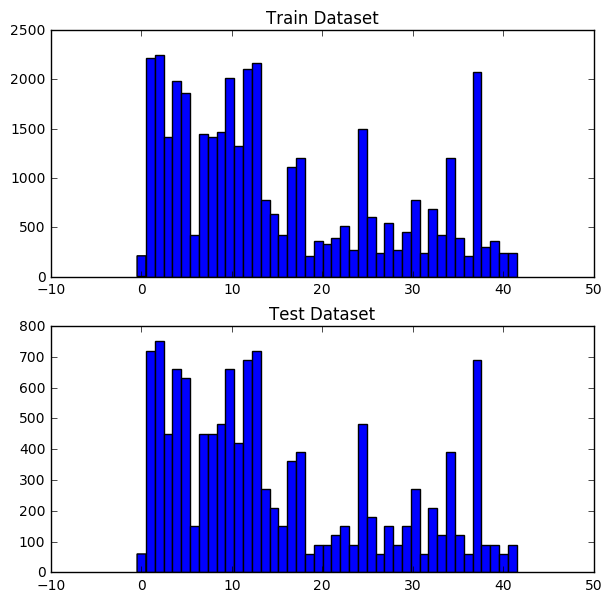

In [7]:
_, ax = plt.subplots(nrows=2, figsize=(7,7))
ax[0].hist(y_train, n_classes, normed=0, histtype='bar', align='left')
ax[1].hist(y_test, n_classes, normed=0, histtype='bar', align='left')
ax[0].set_title("Train Dataset")
_ = ax[1].set_title("Test Dataset")

----

## Step 2: Design and Test a Model Architecture



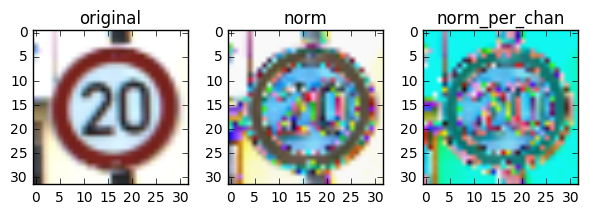

In [8]:
def immean(img):
    return np.mean(img)

def imstd(img):
    num = 1.0
    for x in img.shape: num *= x
    return max(np.std(img), 1.0/(np.sqrt(num)))

def norm(img):
    return (img - immean(img)) / imstd(img)

def immean_per_channel(img):
    return np.mean(img, axis=(0,1))

def imstd_per_channel(img):
    num = img.shape[0] * img.shape[1]
    sqrts = [1.0/np.sqrt(num)] * img.shape[2]
    stds = np.std(img, axis=(0,1))
    return list(map(max, zip(stds, sqrts)))

def norm_per_channel(img):
    return (img - immean_per_channel(img)) / imstd_per_channel(img)

image_index = 128
train_image = X_train[image_index]

train_image = np.array(train_image, dtype=np.float32)
norm_chan_image = norm_per_channel(train_image)
norm_image = norm(train_image)

examples = [("original", np.uint8(train_image)),
            ("norm", norm_image),
            ("norm_per_chan", norm_chan_image)]

_, axes = plt.subplots(ncols=len(examples), squeeze=True)
for i, ax in enumerate(axes):
    ax.set_title(examples[i][0])
    ax.imshow(examples[i][1])

plt.tight_layout()

In [9]:
# Fraction defines how many new samples should be generated comparatively original dataset
fraction = 1
# Train augmentation size
aug_size = int(n_train * fraction)

xaug, yaug = traffic_data.augment(X_train, y_train, aug_size)

assert(xaug.shape[0] == yaug.shape[0])
print("Number of augmented images: ", yaug.shape[0])

Number of augmented images:  39209


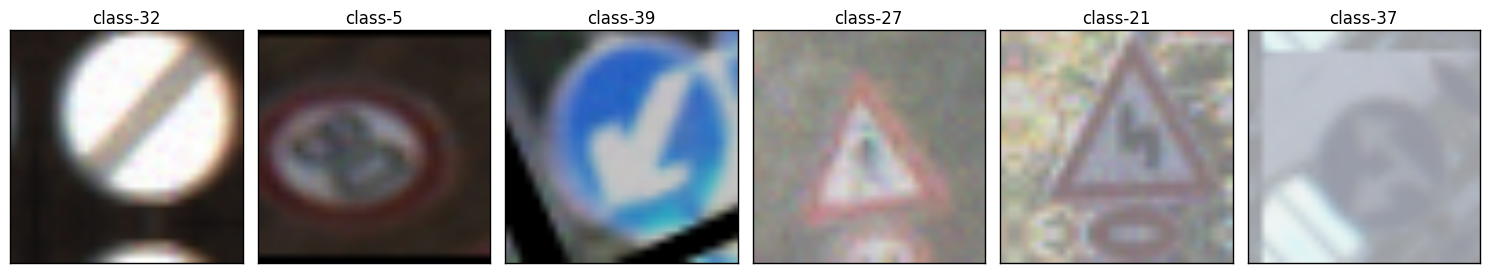

In [10]:
examples_num = 6

fig, axes = plt.subplots(ncols=examples_num, figsize=(15, 3), squeeze=True)

stride = 1000
for i, ax in enumerate(axes):
    ax.imshow(xaug[i + stride])
    ax.set_title("class-{0}".format(yaug[i + stride]))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

fig.tight_layout()

In [11]:
xnew = np.concatenate((X_train, xaug), axis=0)
ynew = np.concatenate((y_train, yaug), axis=0)

In [12]:

num_new = xnew.shape[0]

print("Total number of augmented training examples =", num_new)

Total number of augmented training examples = 78418


#### Histograms of new generated dataset

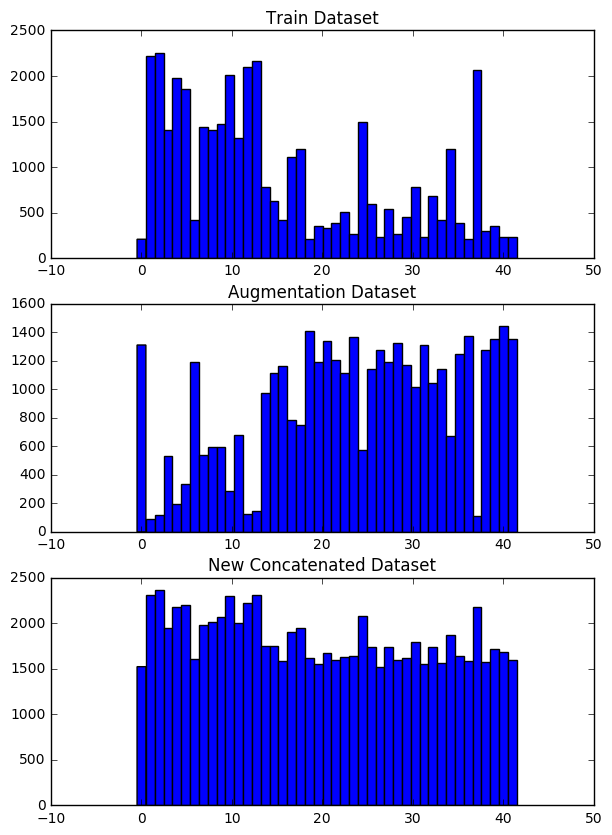

In [13]:
_, ax = plt.subplots(nrows=3, figsize=(7,10))
ax[0].hist(y_train, n_classes, normed=0, histtype='bar', align='left')
ax[1].hist(yaug, n_classes, normed=0, histtype='bar', align='left')
ax[2].hist(ynew, n_classes, normed=0, histtype='bar', align='left')
ax[0].set_title("Train Dataset")
ax[1].set_title("Augmentation Dataset")
_ = ax[2].set_title("New Concatenated Dataset")

Dataset description of new dataset shows that class fractions varies within **`1.8`% - `3.0`%** and this is enormous improvement.

In [14]:
descr_new = traffic_data.label_description(ynew)

pd.options.display.float_format = '{:.3%}'.format
display(descr_new)

class  count  percentage
0       2   2366      3.017%
1      13   2308      2.943%
2       1   2308      2.943%
3      10   2297      2.929%
4      12   2225      2.837%
5       5   2195      2.799%
6      38   2180      2.780%
7       4   2173      2.771%
8      25   2077      2.649%
9       9   2069      2.638%
10      8   2009      2.562%
11     11   1998      2.548%
12      7   1977      2.521%
13     18   1949      2.485%
14      3   1942      2.476%
15     17   1898      2.420%
16     35   1873      2.388%
17     31   1794      2.288%
18     14   1754      2.237%
19     15   1747      2.228%
20     26   1741      2.220%
21     33   1736      2.214%
22     28   1736      2.214%
23     40   1712      2.183%
24     41   1686      2.150%
25     21   1672      2.132%
26     24   1639      2.090%
27     36   1637      2.088%
28     23   1625      2.072%
29     30   1622      2.068%
30     19   1618      2.063%
31      6   1611      2.054%
32     22   1598      2.038%
33     42   1597      2.037%
34     29   1596      2.035%
35     37   1587      2.024%
36     16   1583      2.019%
37     39   1575      2.008%
38     34   1566      1.997%
39     20   1551      1.978%
40     32   1549      1.975%
41      0   1522      1.941%
42     27   1520      1.938%

#### Split dataset onto validation and training datasets accordingly and save all of them as tensorflow records

In [15]:
shapes = traffic_data.save_for_training(xnew, ynew, X_test, y_test,
                                        model_dir="tfdir",
                                        valid_size=0.1,
                                        override=False)
print("Shape of training dataset: x={0}, y={1}".format(shapes[0], shapes[1]))
print("Shape of validation dataset: x={0}, y={1}".format(shapes[2], shapes[3]))

Shape of training dataset: x=(70576, 32, 32, 3), y=(70576,)
Shape of validation dataset: x=(7842, 32, 32, 3), y=(7842,)


Train tensorflow record tfdir/data/train0.tfrecords already exists
Train tensorflow record tfdir/data/train1.tfrecords already exists
Train tensorflow record tfdir/data/train2.tfrecords already exists
Train tensorflow record tfdir/data/train3.tfrecords already exists
Valid tensorflow record tfdir/data/valid.tfrecords already exists
Test tensorflow record tfdir/data/test.tfrecords already exists


In [17]:
import resnet

print(resnet.resnet_params())

nn_params(learning_rate=0.1, num_resunits_per_block=2, batch_size=128, num_labels=43, weight_decay_rate=0.0003, momentum_term=0.9, depths=[16, 64, 128, 256], image_shape=[32, 32, 3])


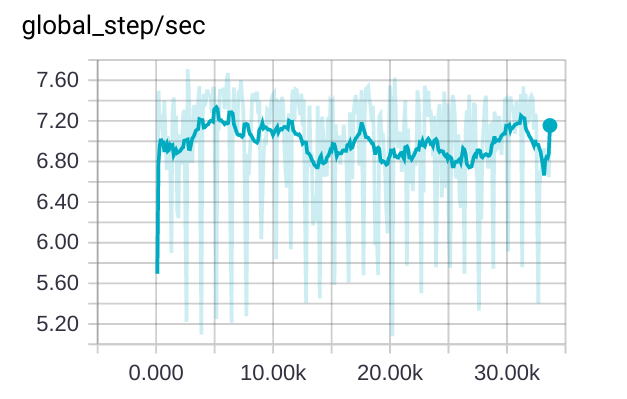

In [73]:
Image(filename="tfdir/model/global-step.png")

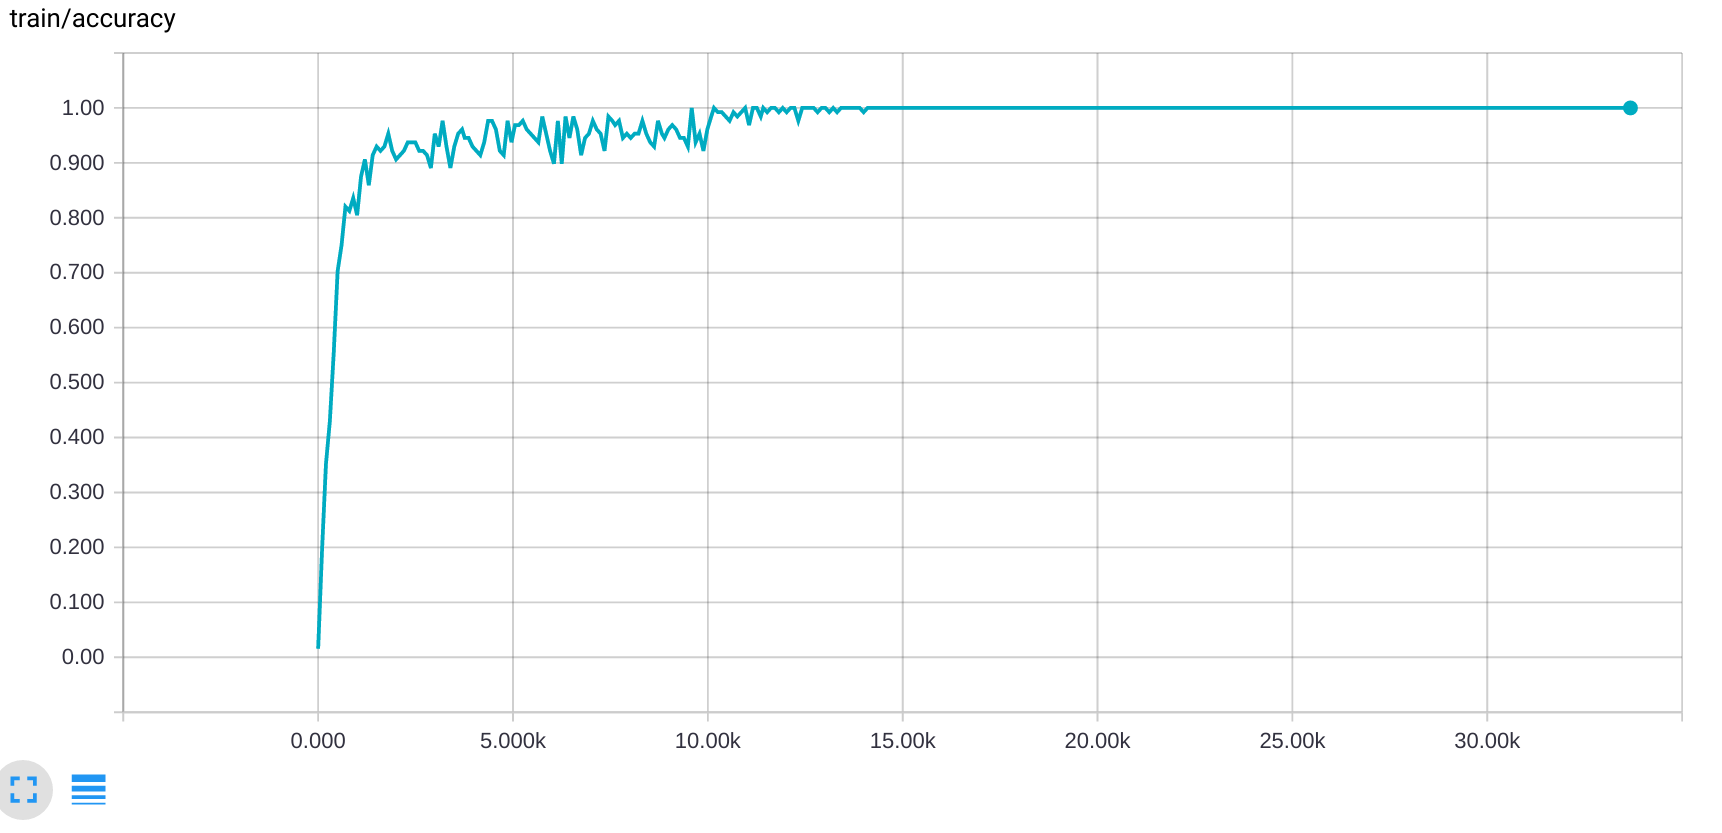

In [74]:
Image(filename="tfdir/model/train-accuracy.png")

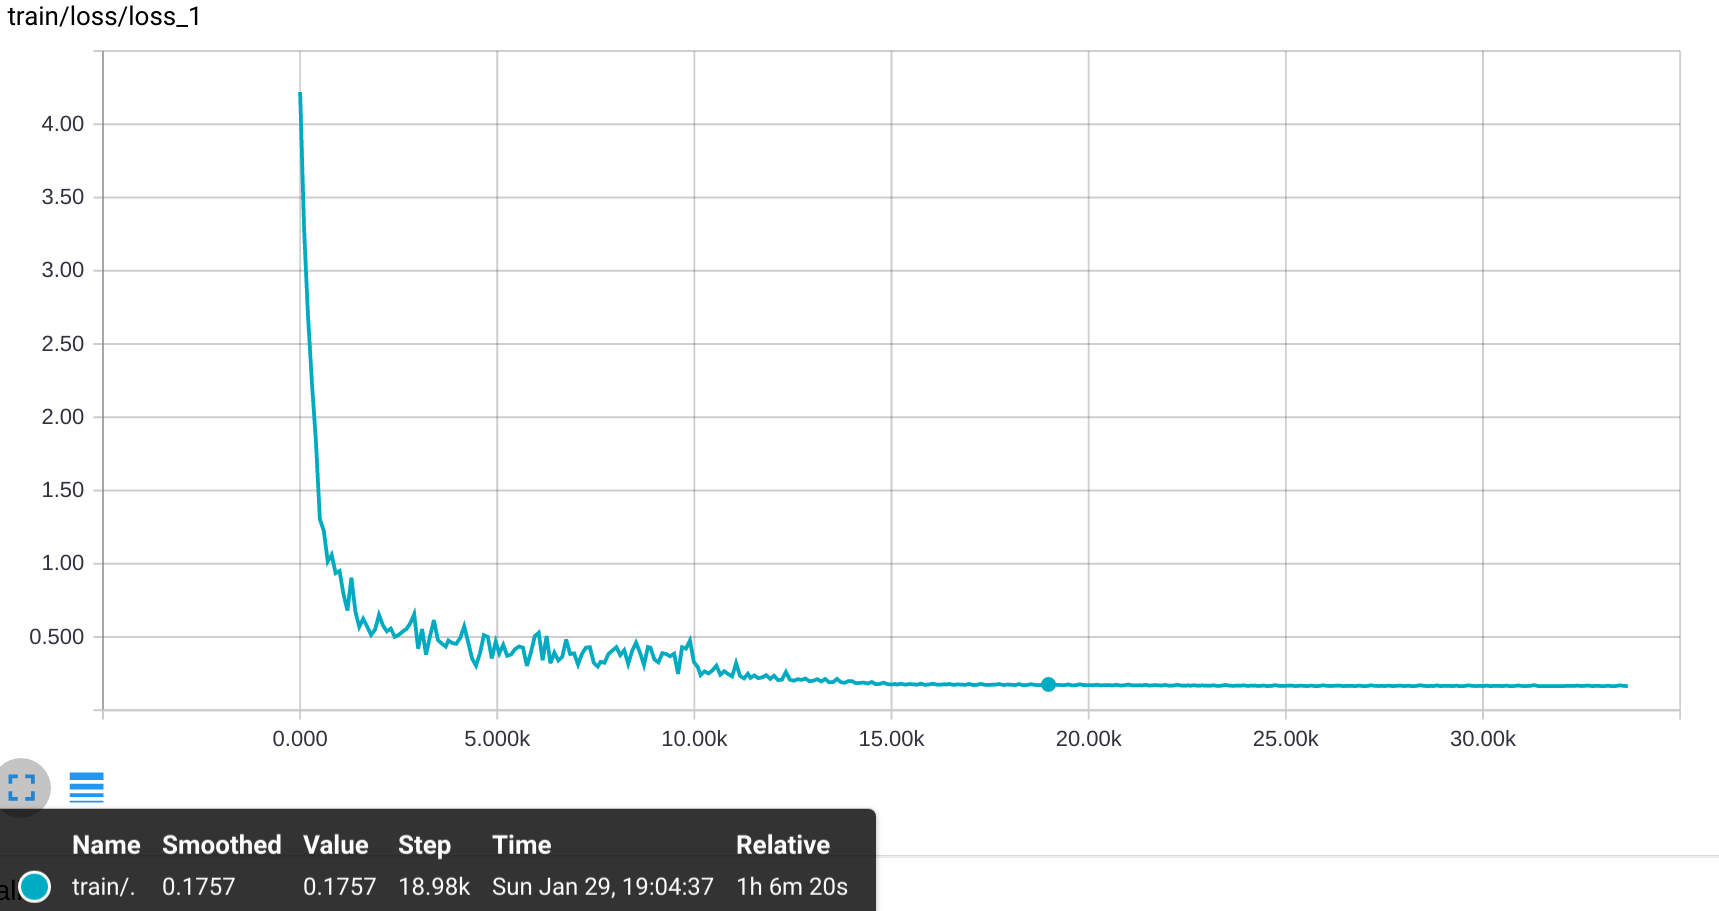

In [75]:
Image(filename="tfdir/model/train-loss.png")

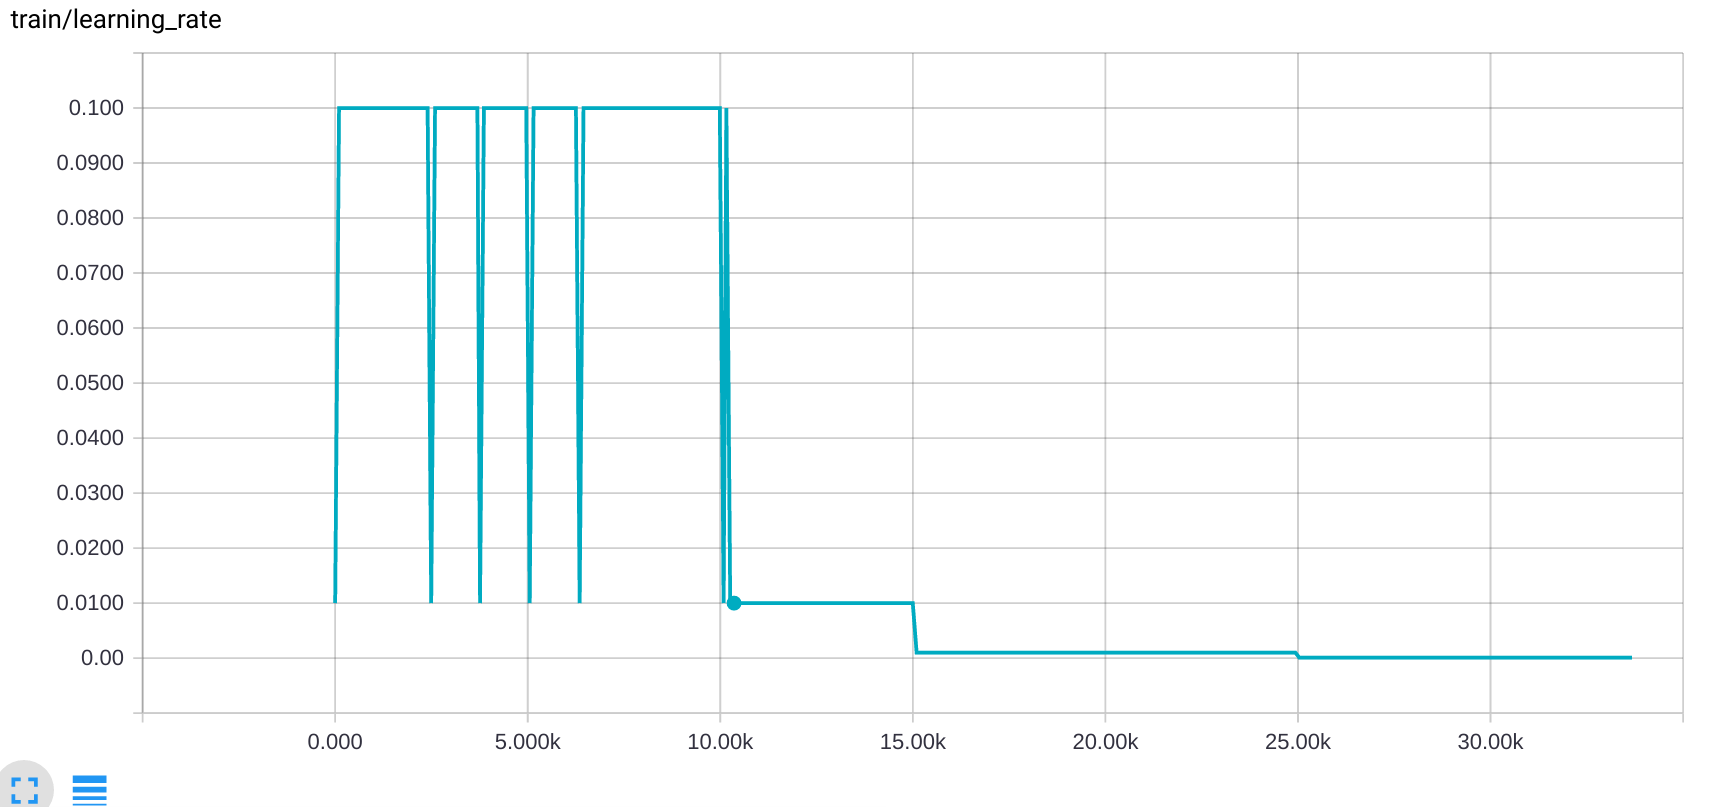

In [76]:
Image(filename="tfdir/model/train-learning-rate.png")

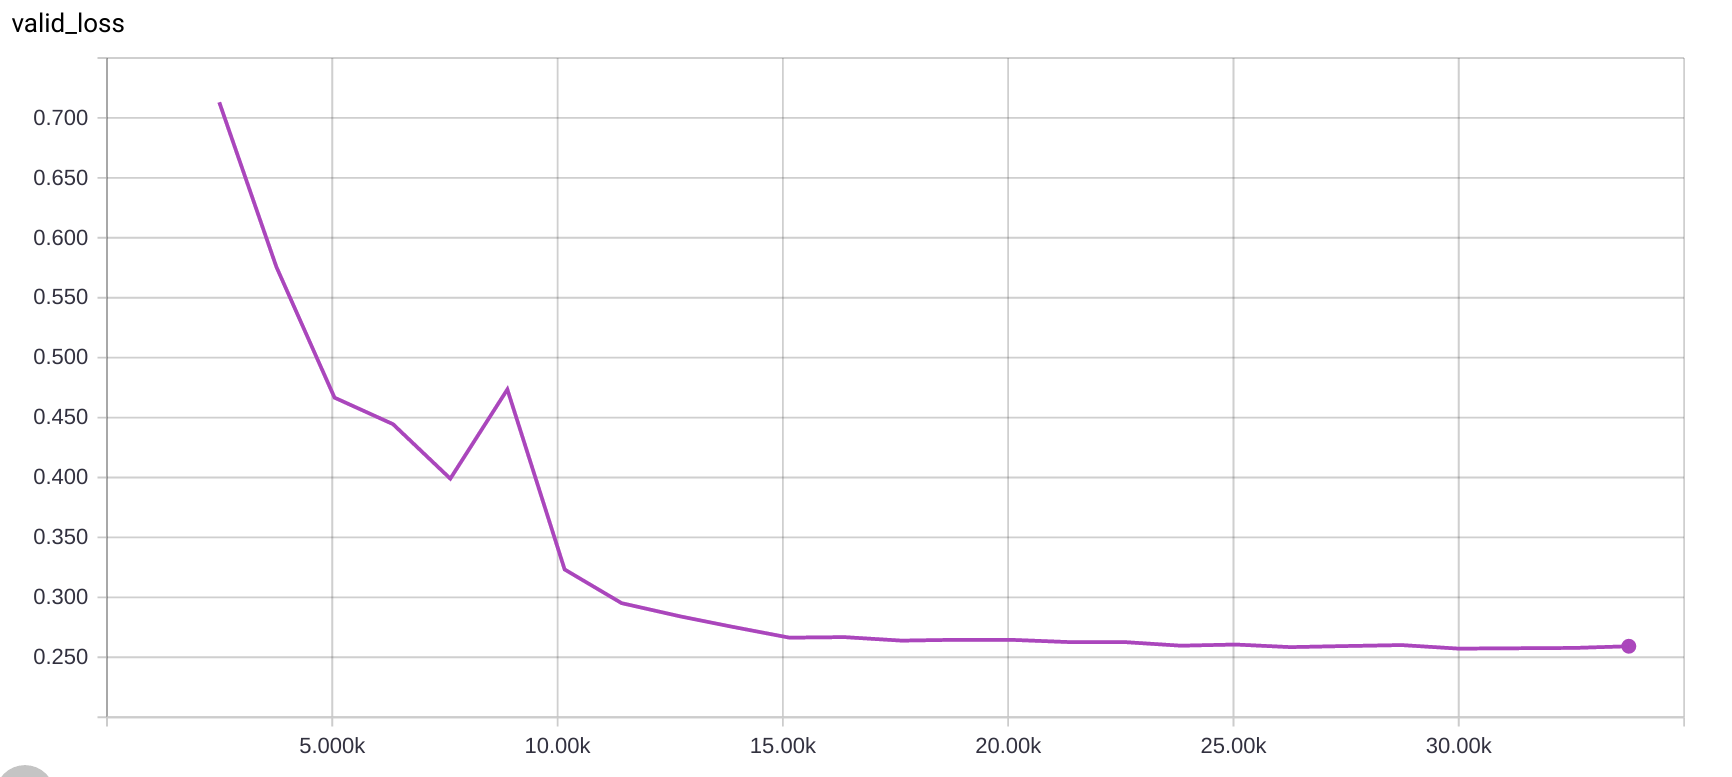

In [77]:
Image(filename="tfdir/model/valid-loss.png")

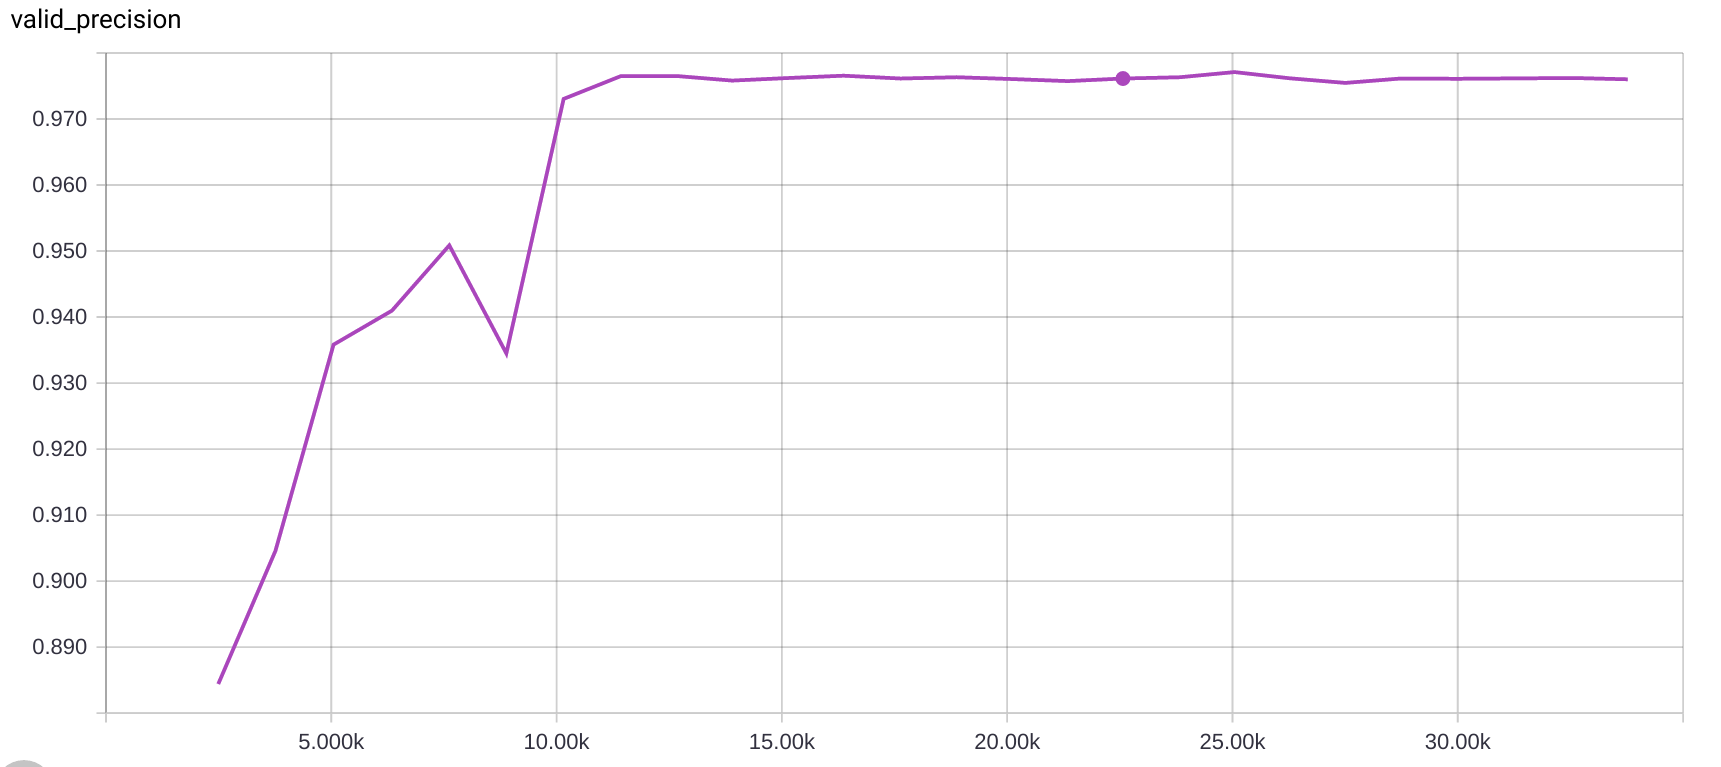

In [78]:
Image(filename="tfdir/model/valid-precision.png")

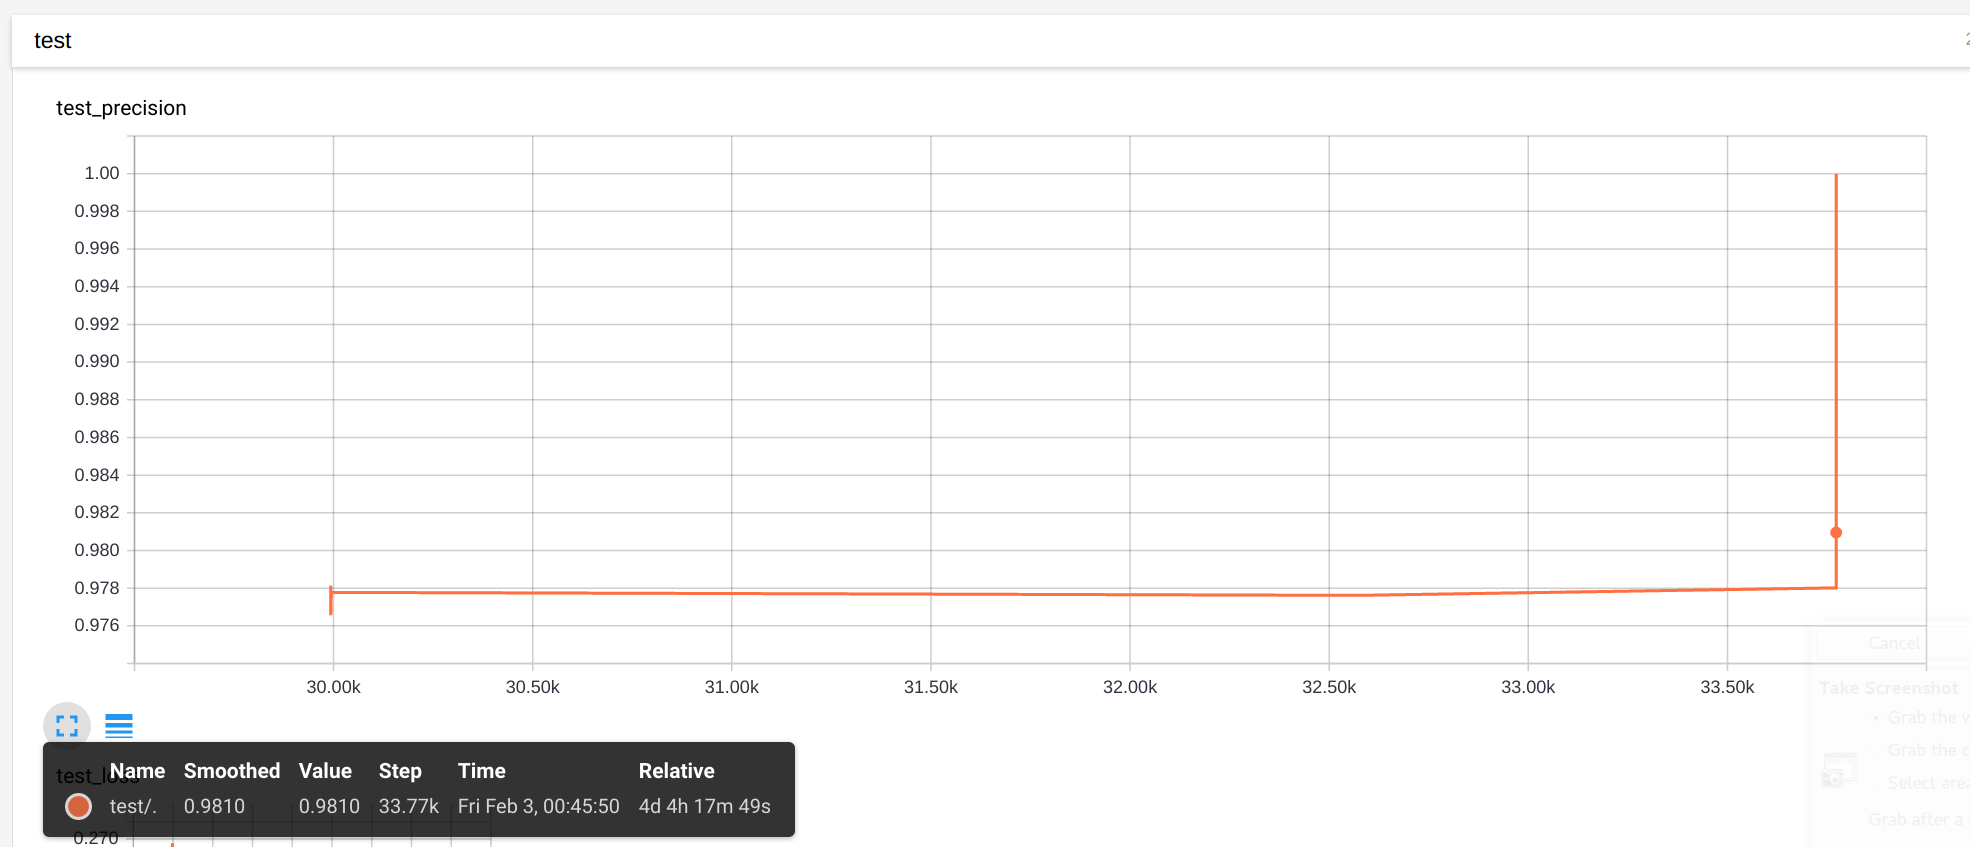

In [82]:
Image(filename="tfdir/model/test-accuracy.png")

## This should be plot with only one plot, although I tested different models with the same path
## tensorflow save it for me :)
## Final accuracy is 98.1%

---

## Step 3: Test a Model on New Images



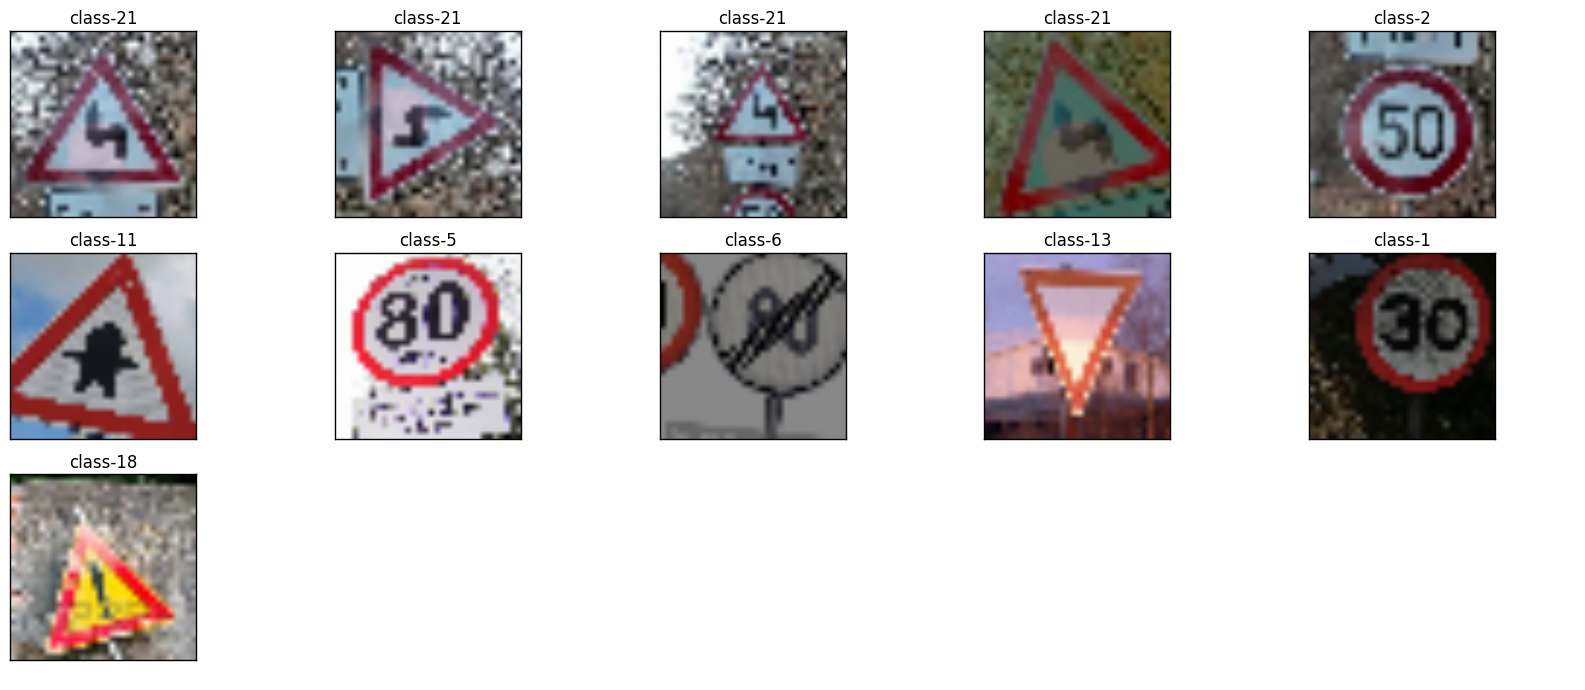

In [46]:
import pickle
import cv2 as cv

outside_images = "data/images.p"
with open(outside_images, "rb") as outside_images_file:
    images, labels = pickle.load(outside_images_file)

for i, _ in enumerate(images):
    images[i] = cv.cvtColor(images[i], cv.COLOR_BGR2RGB)

labels[-1] = 18
num_images = images.shape[0]
cols = num_images // 2
rows = num_images // cols + num_images % cols
figsize = (15, 7)

label_names = list(map(lambda i: "class-" + str(i), labels))

show_images(images, label_names, rows, cols, figsize)

In [33]:
signames_table = pd.DataFrame({"Sign Name": signames}, index=range(len(signames)))
display(signames_table)

Sign Name
0                                Speed limit (20km/h)
1                                Speed limit (30km/h)
2                                Speed limit (50km/h)
3                                Speed limit (60km/h)
4                                Speed limit (70km/h)
5                                Speed limit (80km/h)
6                         End of speed limit (80km/h)
7                               Speed limit (100km/h)
8                               Speed limit (120km/h)
9                                          No passing
10       No passing for vechiles over 3.5 metric tons
11              Right-of-way at the next intersection
12                                      Priority road
13                                              Yield
14                                               Stop
15                                        No vechiles
16           Vechiles over 3.5 metric tons prohibited
17                                           No entry
18                                    General caution
19                        Dangerous curve to the left
20                       Dangerous curve to the right
21                                       Double curve
22                                         Bumpy road
23                                      Slippery road
24                          Road narrows on the right
25                                          Road work
26                                    Traffic signals
27                                        Pedestrians
28                                  Children crossing
29                                  Bicycles crossing
30                                 Beware of ice/snow
31                              Wild animals crossing
32                End of all speed and passing limits
33                                   Turn right ahead
34                                    Turn left ahead
35                                         Ahead only
36                               Go straight or right
37                                Go straight or left
38                                         Keep right
39                                          Keep left
40                               Roundabout mandatory
41                                  End of no passing
42  End of no passing by vechiles over 3.5 metric ...

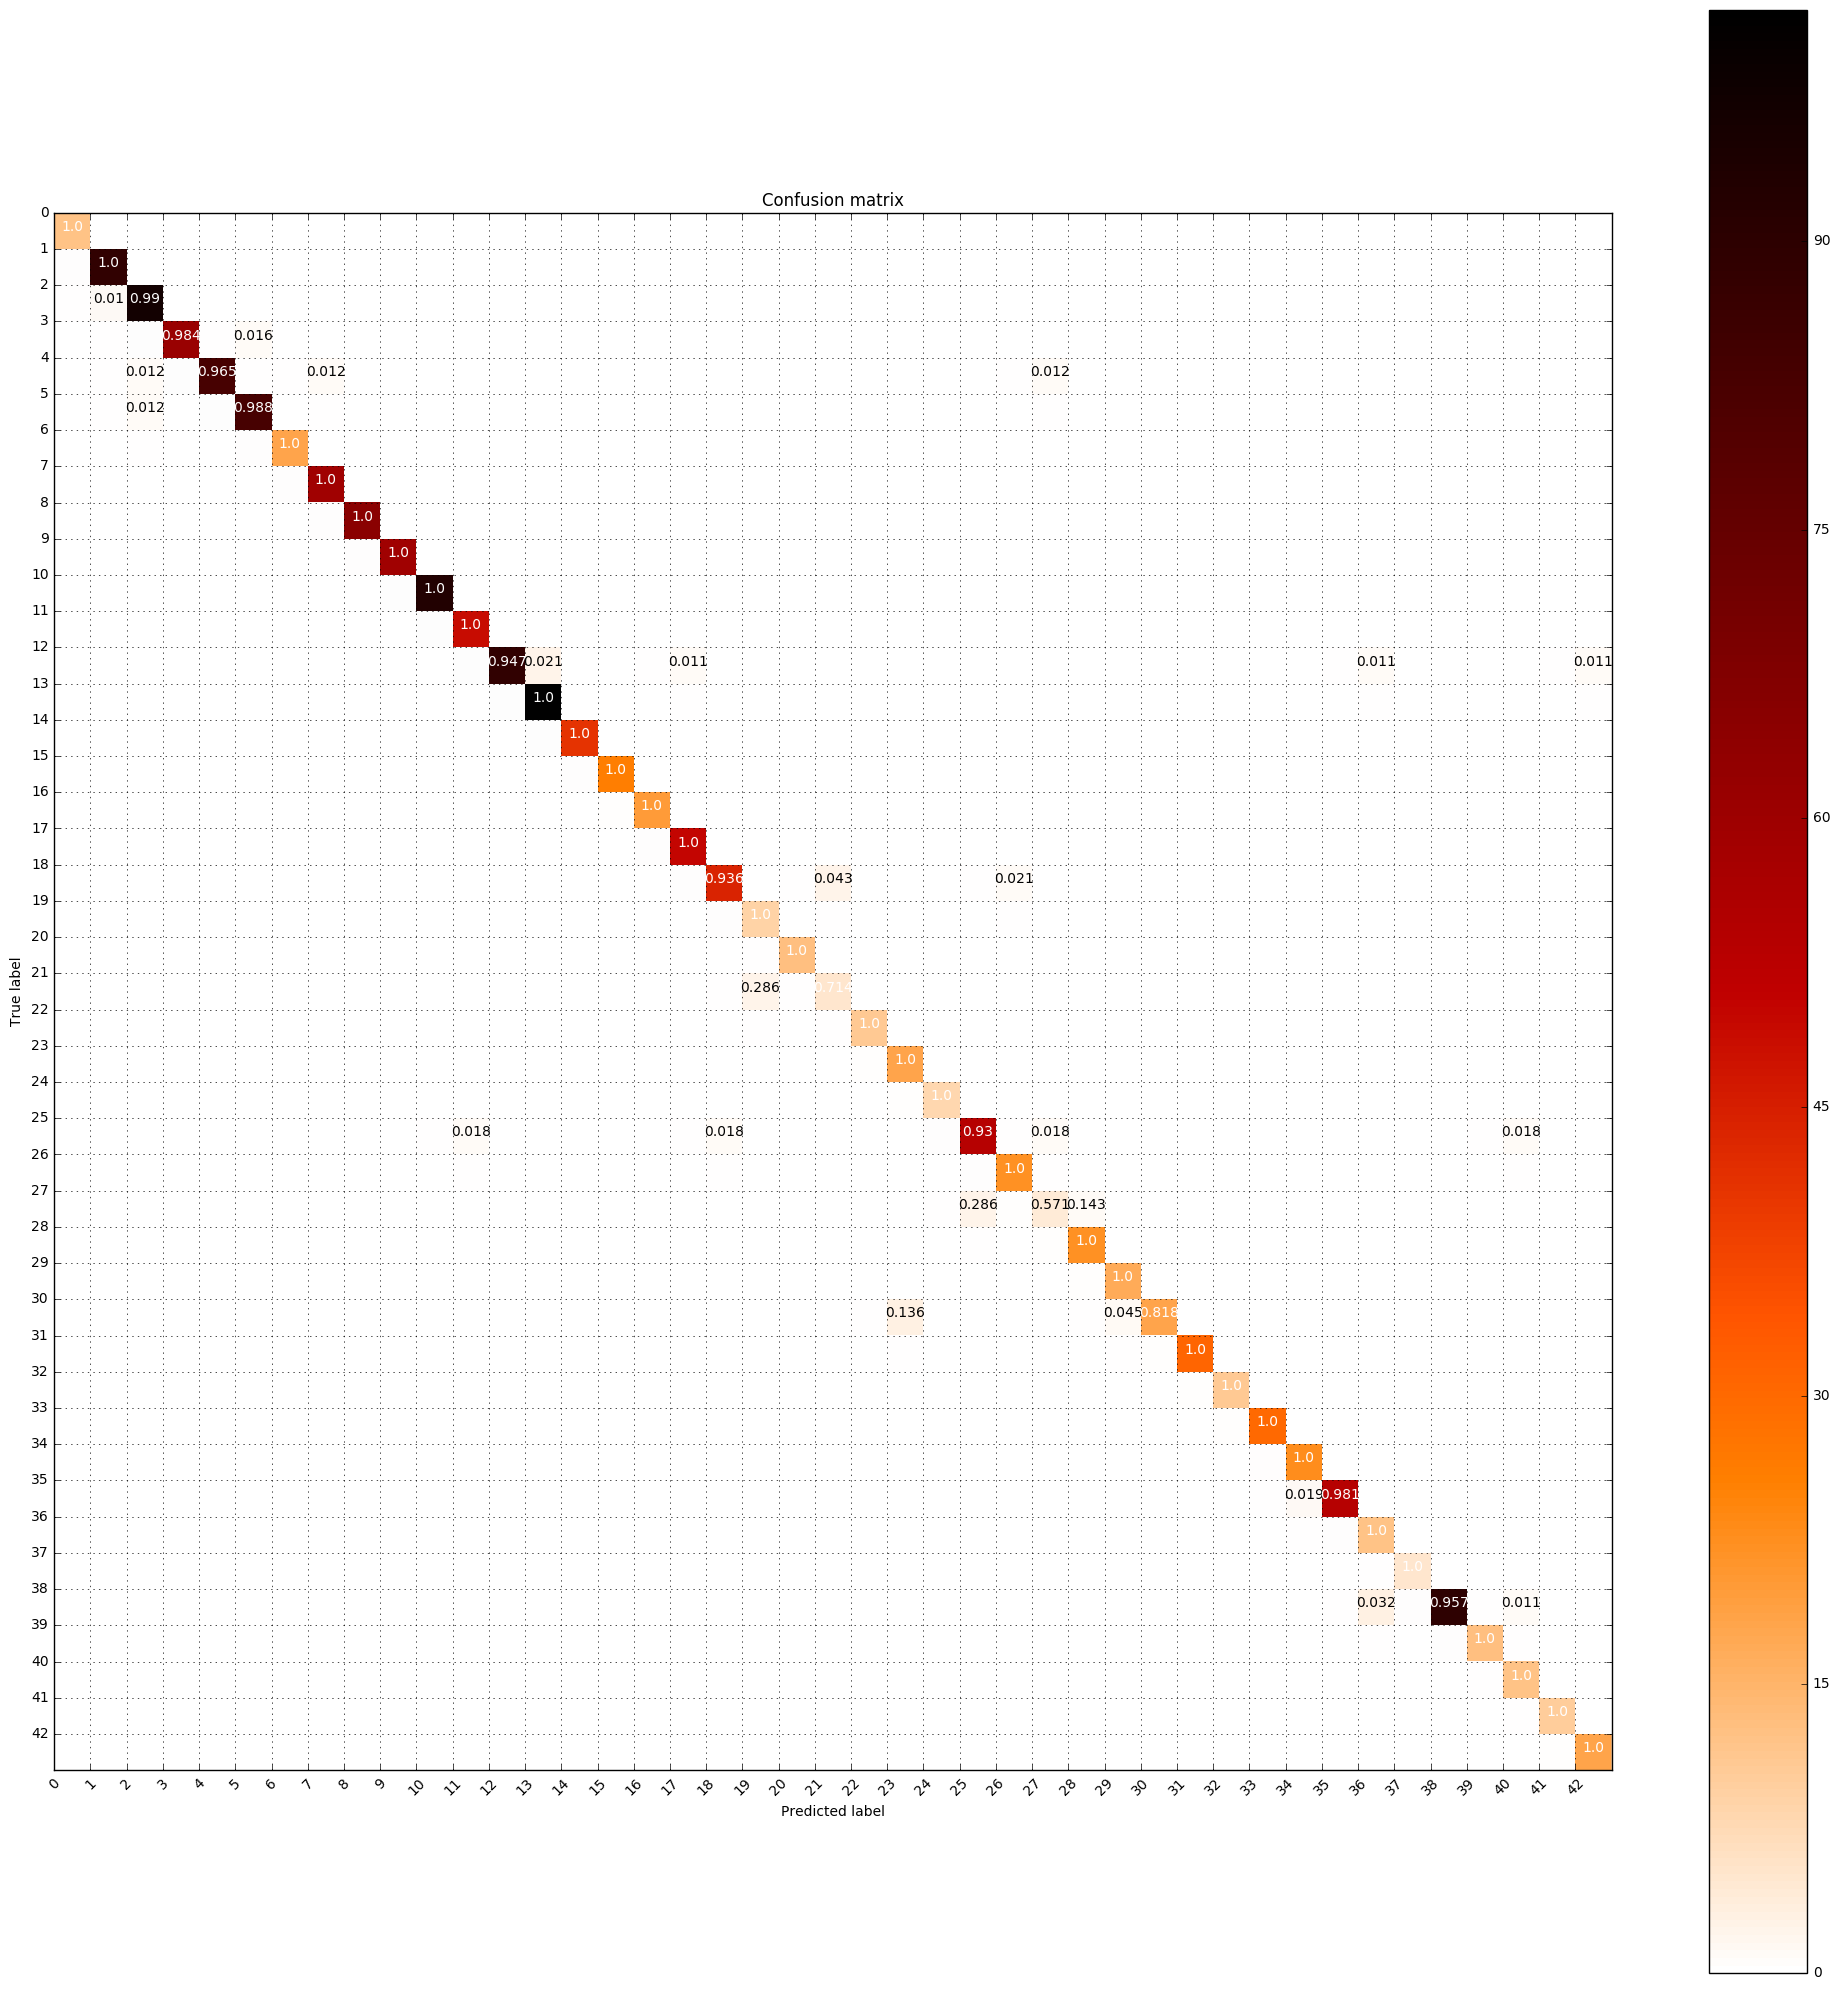

In [79]:
import itertools

cfm_src_file = "tfdir/model/confusion_matrix.p"
with open(cfm_src_file, "rb") as cfm_file:
    confusion_matrix = pickle.load(cfm_file)

def show_confusion_matrix(cfm, labels, normalize=True, title='Confusion matrix', cmap=plt.cm.gist_heat_r):
    plt.figure(figsize=(20,20))
    plt.grid(True)
    plt.imshow(cfm, interpolation='none', cmap=cmap)
    plt.colorbar()
    plt.title(title)
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks - 0.5, labels, rotation=45)
    plt.yticks(tick_marks - 0.5, labels)
    if normalize:
        cfm = cfm.astype('float') / cfm.sum(axis=1)[:, np.newaxis]
    thresh = cfm.max() / 1.5
    for i, j in itertools.product(range(cfm.shape[0]), range(cfm.shape[1])):
        if cfm[i, j] != 0:
            plt.text(j, i, np.round(cfm[i, j], 3), horizontalalignment="center",
                     color="white" if cfm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    top_prec = np.sort(cfm, axis=1).T[::-1][0]
    top = 10
    top_10 = (np.argsort(top_prec)[:top], np.sort(top_prec)[:top])
    return top_10
    
top_10 = show_confusion_matrix(confusion_matrix, range(n_classes))

In [72]:
top_10_table = pd.DataFrame({"Class Index": top_10[0], "Precision": top_10[1]})
display(top_10_table)

Class Index  Precision
0           27    57.143%
1           21    71.429%
2           30    81.818%
3           25    92.982%
4           18    93.617%
5           12    94.681%
6           38    95.745%
7            4    96.512%
8           35    98.148%
9            3    98.387%

In [44]:
import os
import resnet
import traffic_data
import tensorflow as tf

model_dir = "tfdir/model/train/"

inferences = []
top_5s = []

tfrecord = "testrecord"
tfrecord_file = tfrecord + ".tfrecords"
cwd = os.getcwd()
for i in range(num_images):
    tf.reset_default_graph()
    traffic_data.save_as_tfrecords(np.array([images[i]]), np.array([labels[i]]), tfrecord_file)
    ##########################################################
    #### Let's run saved Tensorflow model on input test images
    ##########################################################
    inference = resnet.single_test(tfrecord, ".", model_dir)
    inference = inference[0]
    inferences.append(inference)
    top_5 = list(zip(np.argsort(inference)[::-1], np.sort(inference)[::-1]))[:5]
    top_5s.append(top_5)

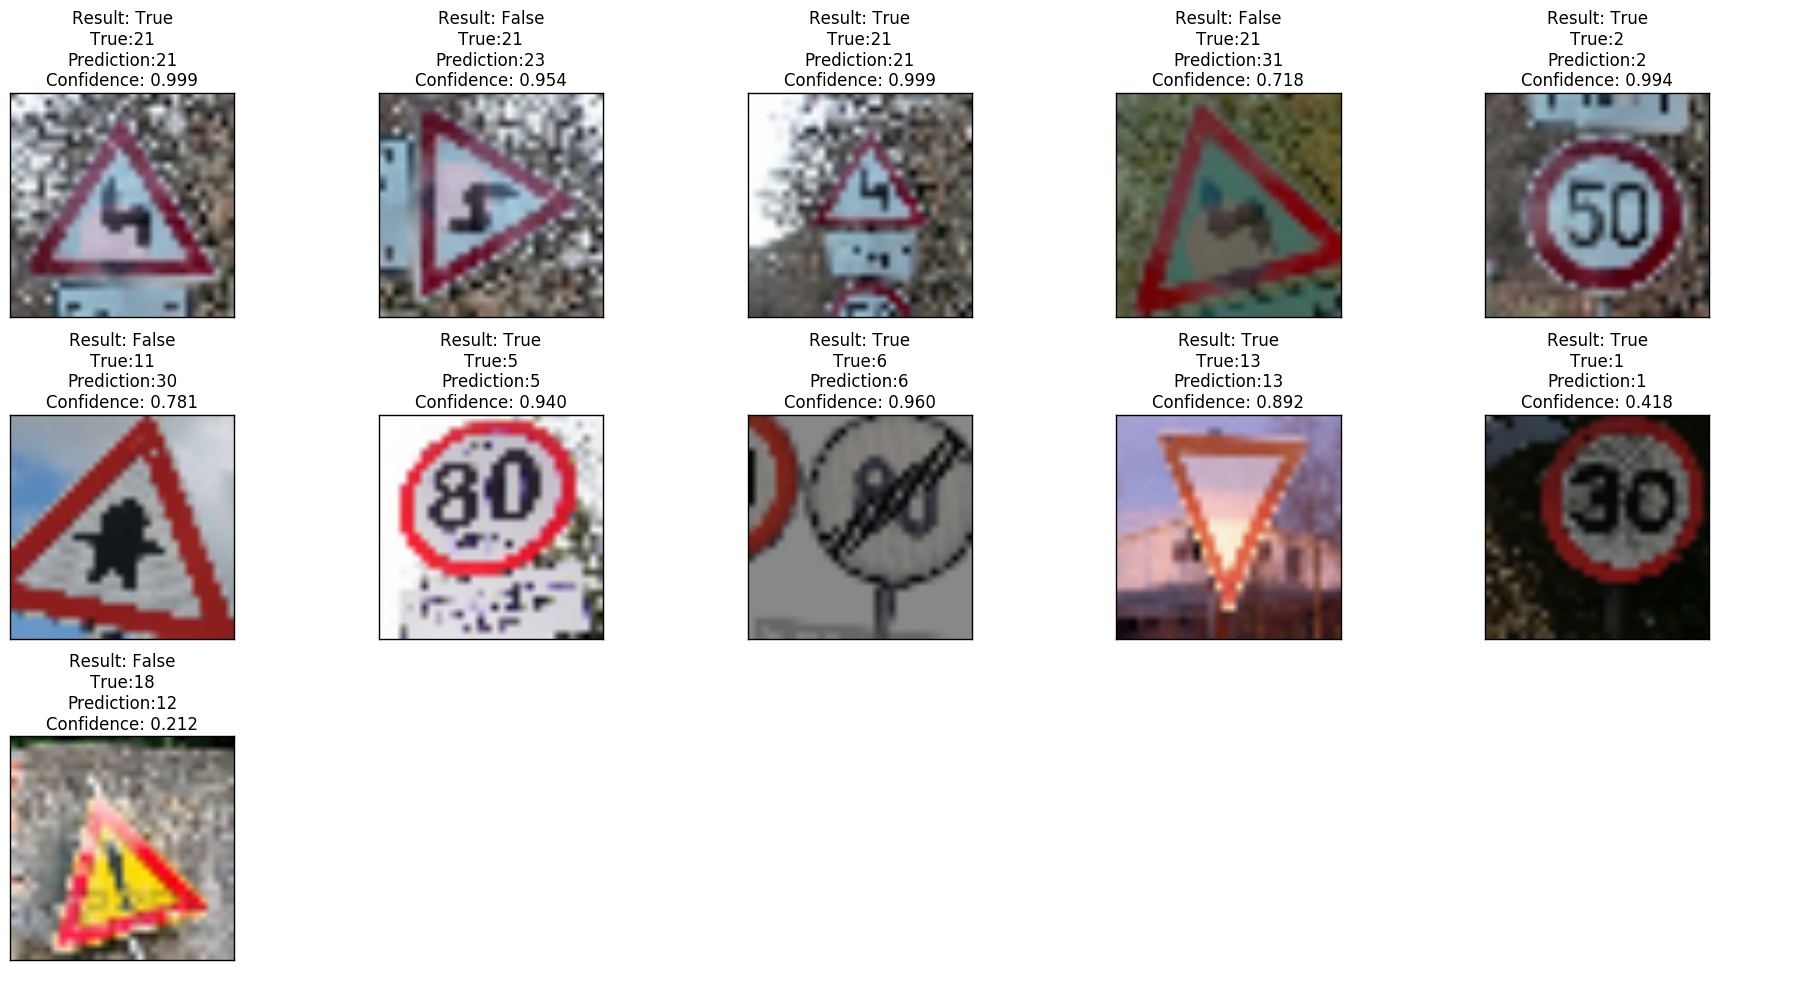

In [45]:
def format_annotation(res, label):
    return "Result: {0}\nTrue:{1}\nPrediction:{2}\nConfidence: {3:.3f}".format(
        res[0] == label,
        label,
        res[0],
        res[1]
    )
annotations = list(map(lambda i: format_annotation(top_5s[i][0], labels[i]), range(num_images)))
figsize=(17, 10)
show_images(images, annotations, rows, cols, figsize)

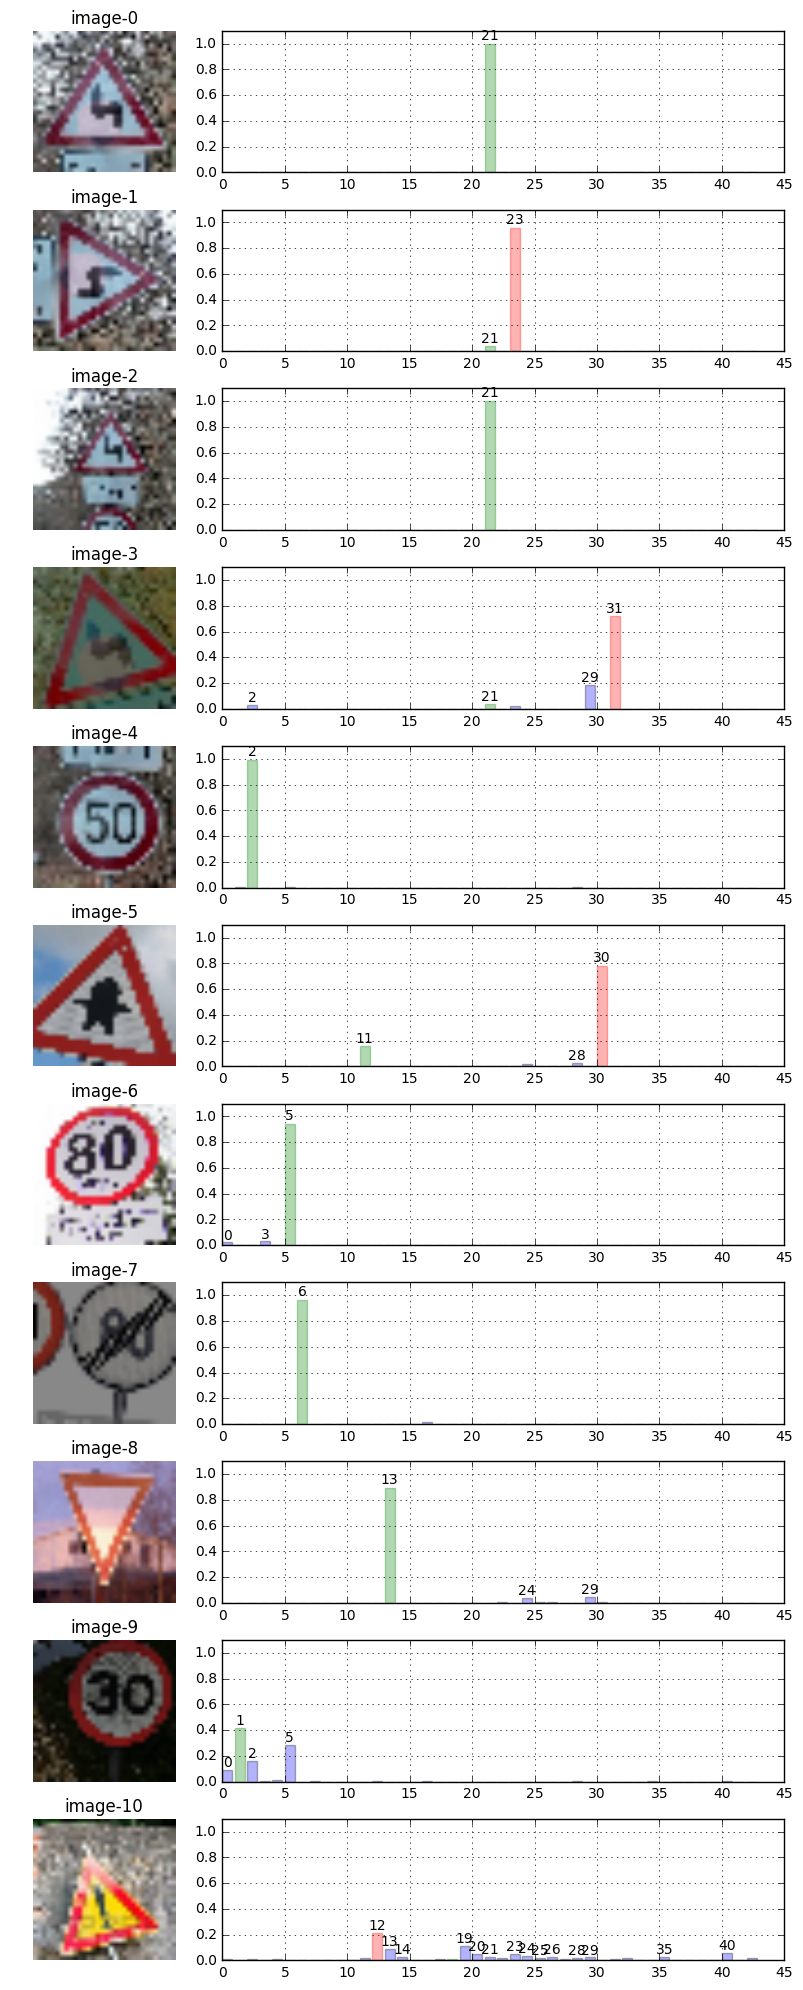

In [116]:

bar_height_limit = 0.02
fig, axes = plt.subplots(nrows=num_images, ncols=2, squeeze=True, figsize=(10,20))
image_names = ["image-{0}".format(i) for i in range(num_images)]
for i in range(num_images):
    ax = axes[i]
    ax[0].axis("off")
    ax[0].get_xaxis().set_visible(False)
    ax[0].get_yaxis().set_visible(True)
    ax[0].imshow(images[i])  
    ax[0].set_title(image_names[i])
    rects = ax[1].bar(range(len(inferences[i])), inferences[i], color="b", alpha=0.3)
    ax[1].grid(True)
    ax[1].set_ylim([0,1.1])
    true_id = labels[i]
    pred_id = top_5s[i][0][0]
    rects[true_id].set_color('g')
    if pred_id != true_id:
        rects[pred_id].set_color('r')
    for r, rect in enumerate(rects):
        height = rect.get_height()
        if height <= bar_height_limit:
            continue
        ann = "{0}".format(r)
        ax[1].text(rect.get_x() + rect.get_width()/2., 
                   1.01 * height, ann, ha='center', va='bottom')

fig.subplots_adjust(wspace=0, left=-0.1)
fig.tight_layout(w_pad=0)

In [177]:
columns = np.arange(0, 10, 2)
column_names = []
t = 1
for i in range(5 * 2):
    if i % 2 == 0:
        column_names.append("top-{0}/class".format(t))
    else:
        column_names.append("top-{0}/acc".format(t))
        t += 1

## If it could be a R language this expression would look better :)
top_5s_table = pd.DataFrame([list(np.array(list(map(lambda r: [r[0], r[1]], t))).flat) for t in top_5s])
top_5s_table[columns] = top_5s_table[columns].astype(int)
top_5s_table.columns = column_names
top_5s_table.index = image_names

pd.options.display.float_format = '{:.5%}'.format
display(top_5s_table)

top-1/class  top-1/acc  top-2/class  top-2/acc  top-3/class  \
image-0            21  99.94030%           31   0.03912%            2   
image-1            23  95.41949%           21   4.31921%           28   
image-2            21  99.85033%            2   0.06360%           31   
image-3            31  71.81113%           29  18.31939%           21   
image-4             2  99.36317%            1   0.29460%           28   
image-5            30  78.07942%           11  15.60679%           28   
image-6             5  93.99465%            3   2.92375%            0   
image-7             6  96.00231%           16   1.55681%           32   
image-8            13  89.16283%           29   4.59777%           24   
image-9             1  41.76812%            5  28.37510%            2   
image-10           12  21.21349%           19  11.20450%           13   

          top-3/acc  top-4/class  top-4/acc  top-5/class  top-5/acc  
image-0    0.00629%           23   0.00582%           19   0.00347%  
image-1    0.08865%           19   0.06645%           25   0.03359%  
image-2    0.05863%           29   0.01142%           38   0.00222%  
image-3    3.99575%            2   3.23200%           23   1.82145%  
image-4    0.11352%            5   0.07923%           12   0.04830%  
image-5    2.77974%           24   1.57567%           27   0.41570%  
image-6    2.15950%            2   0.51506%           28   0.19902%  
image-7    0.35513%           41   0.30754%            3   0.28255%  
image-8    3.66109%           26   0.76909%           25   0.73769%  
image-9   15.79506%            0   9.29639%            4   1.60588%  
image-10   8.70751%           40   5.53107%           20   5.31103%